In [1]:
import pandas as pd
from pandas import merge
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import glob,os
files = glob.glob('data/*.csv')
print(files)

['data\\t_TC_112_1.csv', 'data\\t_TC_112_2.csv', 'data\\t_TC_114_1.csv', 'data\\t_TC_115_1.csv', 'data\\t_TC_115_2.csv', 'data\\t_TC_115_3.csv', 'data\\t_TC_117_2.csv', 'data\\t_TC_117_3.csv', 'data\\t_TC_162A_1.csv', 'data\\t_TC_162A_2.csv', 'data\\t_TC_162A_3.csv', 'data\\t_TC_162A_4.csv', 'data\\t_TC_162A_5.csv', 'data\\t_TC_162A_6.csv', 'data\\t_TC_162B_1.csv', 'data\\t_TC_162B_2.csv', 'data\\t_TC_162B_3.csv', 'data\\t_TC_162B_4.csv', 'data\\t_TC_162B_5.csv', 'data\\t_TC_162B_6.csv', 'data\\t_TC_303_1.csv', 'data\\t_TC_303_2.csv', 'data\\t_TC_304_1.csv', 'data\\t_TC_304_3.csv', 'data\\t_TC_304_4.csv', 'data\\t_TC_305_1.csv', 'data\\t_TC_305_2.csv', 'data\\t_TC_305_3.csv', 'data\\t_TC_305_4.csv', 'data\\t_TC_306_1.csv', 'data\\t_TC_306_2.csv', 'data\\t_TC_306_3.csv', 'data\\t_TC_306_4.csv', 'data\\t_TC_309_1.csv', 'data\\t_TC_309_10.csv', 'data\\t_TC_309_2.csv', 'data\\t_TC_309_3.csv', 'data\\t_TC_309_4.csv', 'data\\t_TC_309_5.csv', 'data\\t_TC_309_6.csv', 'data\\t_TC_309_7.csv', 'd

In [3]:
df = pd.concat([pd.read_csv(f).assign(f_name=os.path.basename(f).split('t_')[1].split('.')[0]) for f in files])
print(df)

       Unnamed: 0  time  current  voltage  name       f_name
0               1   434     8403     2059     1     TC_112_1
1               2   453     8380     2030     2     TC_112_1
2               3   453     8390     2041     3     TC_112_1
3               4   451     8382     2003     4     TC_112_1
4               5   288     8154     1524     5     TC_112_1
5               6   291     8157     1551     6     TC_112_1
6               7   286     8245     1541     7     TC_112_1
7               8   583     8480     2541     8     TC_112_1
8               9   448     8384     1857     9     TC_112_1
9              10   442     8383     1989    10     TC_112_1
10             11   453     8396     1972    11     TC_112_1
11             12   441     8392     1980    12     TC_112_1
12             13   447     8401     1960    13     TC_112_1
13             14   311     8240     1972    14     TC_112_1
14             15   363     7770     1640    15     TC_112_1
15             16   369 

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.rename(columns={'time':'weld_time','name':'weld_point','f_name':'robot_name'})
df.head()

weld_time  current  voltage  weld_point robot_name
0        434     8403     2059           1   TC_112_1
1        453     8380     2030           2   TC_112_1
2        453     8390     2041           3   TC_112_1
3        451     8382     2003           4   TC_112_1
4        288     8154     1524           5   TC_112_1

In [5]:
df.shape

(10022802, 5)

In [12]:
df = df[df['current']!=0]
df = df[df['voltage']!=0]

In [13]:
df.shape

(9938685, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9938685 entries, 0 to 91784
Data columns (total 5 columns):
weld_time     int64
current       int64
voltage       int64
weld_point    int64
robot_name    object
dtypes: int64(4), object(1)
memory usage: 455.0+ MB


In [21]:
table = df.pivot_table(index = df.index, columns = ['robot_name'], values = 'current')

In [22]:
table

robot_name  TC_112_1  TC_112_2  TC_114_1  TC_115_1  TC_115_2  TC_115_3  \
0             8403.0    8254.0    6723.0    8514.0    8419.0    8717.0   
1             8380.0    8250.0    6769.0    8331.0    8247.0    8690.0   
2             8390.0    8238.0    7232.0    7782.0    8407.0    8410.0   
3             8382.0    8241.0    6591.0    7722.0    8583.0    8117.0   
4             8154.0    8099.0    6746.0    7793.0    8834.0    8147.0   
5             8157.0    8165.0    6691.0    8334.0    9233.0    8154.0   
6             8245.0    8111.0    6683.0    8349.0    9324.0    8151.0   
7             8480.0    7691.0    6744.0    8636.0    9326.0    8139.0   
8             8384.0    7684.0    7267.0    8602.0    8027.0    7965.0   
9             8383.0    7686.0    6680.0    8144.0    8055.0    9141.0   
10            8396.0    8117.0    6543.0    8174.0    8319.0    9167.0   
11            8392.0    8253.0    7228.0    8373.0    8325.0    9137.0   
12            8401.0    8258.0    6637.0    8297.0    8713.0    8514.0   
13            8240.0    8092.0    6773.0    8123.0    8448.0    9101.0   
14            7770.0    7635.0    7261.0    8205.0    8253.0    9040.0   
15            8070.0    7778.0    6737.0    7965.0    8261.0    9064.0   
16            8060.0    8323.0    6759.0    7521.0    8259.0    7944.0   
17            7942.0    7960.0    6835.0    9009.0    8304.0    7766.0   
18            7893.0    7872.0    6760.0    8533.0    8213.0    7769.0   
19            7752.0    8264.0    6755.0    8534.0    8230.0    8866.0   
20            7737.0    8260.0    6813.0    8611.0    7792.0    8959.0   
21            7741.0    8245.0    6784.0    8616.0    7790.0    8756.0   
22            8271.0    8419.0    6748.0    8215.0    8242.0    8835.0   
23            8392.0    8248.0    7253.0    8173.0    8172.0    8724.0   
24            8387.0    8254.0    6680.0    8417.0    8416.0    8698.0   
25            8376.0    8243.0    6748.0    8213.0    8274.0    8663.0   
26            8381.0    8246.0    7264.0    8342.0    8289.0    8130.0   
27            8169.0    8103.0    6691.0    7770.0    8570.0    8126.0   
28            8152.0    8094.0    6766.0    7724.0    9103.0    8185.0   
29            8148.0    8106.0    6998.0    7821.0    8954.0    8167.0   
...              ...       ...       ...       ...       ...       ...   
192994           NaN       NaN       NaN       NaN       NaN       NaN   
192995           NaN       NaN       NaN       NaN       NaN       NaN   
192996           NaN       NaN       NaN       NaN       NaN       NaN   
192997           NaN       NaN       NaN       NaN       NaN       NaN   
192998           NaN       NaN       NaN       NaN       NaN       NaN   
192999           NaN       NaN       NaN       NaN       NaN       NaN   
193000           NaN       NaN       NaN       NaN       NaN       NaN   
193001           NaN       NaN       NaN       NaN       NaN       NaN   
193002           NaN       NaN       NaN       NaN       NaN       NaN   
193003           NaN       NaN       NaN       NaN       NaN       NaN   
193004           NaN       NaN       NaN       NaN       NaN       NaN   
193005           NaN       NaN       NaN       NaN       NaN       NaN   
193006           NaN       NaN       NaN       NaN       NaN       NaN   
193007           NaN       NaN       NaN       NaN       NaN       NaN   
193008           NaN       NaN       NaN       NaN       NaN       NaN   
193009           NaN       NaN       NaN       NaN       NaN       NaN   
193010           NaN       NaN       NaN       NaN       NaN       NaN   
193011           NaN       NaN       NaN       NaN       NaN       NaN   
193012           NaN       NaN       NaN       NaN       NaN       NaN   
193013           NaN       NaN       NaN       NaN       NaN       NaN   
193014           NaN       NaN       NaN       NaN       NaN       NaN   
193015           NaN       NaN       NaN       NaN       NaN       NaN   
1930

In [25]:
# fill NA values with 0 and reset the index to robot name
table = table.fillna(0).reset_index(drop = True)

In [36]:
table

robot_name  TC_112_1  TC_112_2  TC_114_1  TC_115_1  TC_115_2  TC_115_3  \
0             8403.0    8254.0    6723.0    8514.0    8419.0    8717.0   
1             8380.0    8250.0    6769.0    8331.0    8247.0    8690.0   
2             8390.0    8238.0    7232.0    7782.0    8407.0    8410.0   
3             8382.0    8241.0    6591.0    7722.0    8583.0    8117.0   
4             8154.0    8099.0    6746.0    7793.0    8834.0    8147.0   
5             8157.0    8165.0    6691.0    8334.0    9233.0    8154.0   
6             8245.0    8111.0    6683.0    8349.0    9324.0    8151.0   
7             8480.0    7691.0    6744.0    8636.0    9326.0    8139.0   
8             8384.0    7684.0    7267.0    8602.0    8027.0    7965.0   
9             8383.0    7686.0    6680.0    8144.0    8055.0    9141.0   
10            8396.0    8117.0    6543.0    8174.0    8319.0    9167.0   
11            8392.0    8253.0    7228.0    8373.0    8325.0    9137.0   
12            8401.0    8258.0    6637.0    8297.0    8713.0    8514.0   
13            8240.0    8092.0    6773.0    8123.0    8448.0    9101.0   
14            7770.0    7635.0    7261.0    8205.0    8253.0    9040.0   
15            8070.0    7778.0    6737.0    7965.0    8261.0    9064.0   
16            8060.0    8323.0    6759.0    7521.0    8259.0    7944.0   
17            7942.0    7960.0    6835.0    9009.0    8304.0    7766.0   
18            7893.0    7872.0    6760.0    8533.0    8213.0    7769.0   
19            7752.0    8264.0    6755.0    8534.0    8230.0    8866.0   
20            7737.0    8260.0    6813.0    8611.0    7792.0    8959.0   
21            7741.0    8245.0    6784.0    8616.0    7790.0    8756.0   
22            8271.0    8419.0    6748.0    8215.0    8242.0    8835.0   
23            8392.0    8248.0    7253.0    8173.0    8172.0    8724.0   
24            8387.0    8254.0    6680.0    8417.0    8416.0    8698.0   
25            8376.0    8243.0    6748.0    8213.0    8274.0    8663.0   
26            8381.0    8246.0    7264.0    8342.0    8289.0    8130.0   
27            8169.0    8103.0    6691.0    7770.0    8570.0    8126.0   
28            8152.0    8094.0    6766.0    7724.0    9103.0    8185.0   
29            8148.0    8106.0    6998.0    7821.0    8954.0    8167.0   
...              ...       ...       ...       ...       ...       ...   
192994           0.0       0.0       0.0       0.0       0.0       0.0   
192995           0.0       0.0       0.0       0.0       0.0       0.0   
192996           0.0       0.0       0.0       0.0       0.0       0.0   
192997           0.0       0.0       0.0       0.0       0.0       0.0   
192998           0.0       0.0       0.0       0.0       0.0       0.0   
192999           0.0       0.0       0.0       0.0       0.0       0.0   
193000           0.0       0.0       0.0       0.0       0.0       0.0   
193001           0.0       0.0       0.0       0.0       0.0       0.0   
193002           0.0       0.0       0.0       0.0       0.0       0.0   
193003           0.0       0.0       0.0       0.0       0.0       0.0   
193004           0.0       0.0       0.0       0.0       0.0       0.0   
193005           0.0       0.0       0.0       0.0       0.0       0.0   
193006           0.0       0.0       0.0       0.0       0.0       0.0   
193007           0.0       0.0       0.0       0.0       0.0       0.0   
193008           0.0       0.0       0.0       0.0       0.0       0.0   
193009           0.0       0.0       0.0       0.0       0.0       0.0   
193010           0.0       0.0       0.0       0.0       0.0       0.0   
193011           0.0       0.0       0.0       0.0       0.0       0.0   
193012           0.0       0.0       0.0       0.0       0.0       0.0   
193013           0.0       0.0       0.0       0.0       0.0       0.0   
193014           0.0       0.0       0.0       0.0       0.0       0.0   
193015           0.0       0.0       0.0       0.0       0.0       0.0   
1930

In [31]:
table.columns

Index(['index', 'TC_112_1', 'TC_112_2', 'TC_114_1', 'TC_115_1', 'TC_115_2',
       'TC_115_3', 'TC_117_2', 'TC_117_3', 'TC_162A_1',
       ...
       'TC_RH_205_3', 'TC_RH_208_2', 'TC_RH_208_3', 'TC_RH_209_2',
       'TC_RH_209_2_1', 'TC_RH_210_1', 'TC_RH_210_2', 'TC_RH_211_1',
       'TC_RH_211_2', 'TC_RH_211_3'],
      dtype='object', name='robot_name', length=103)

In [33]:
del table['index']

In [35]:
table.shape

(193024, 102)

In [37]:
table.columns

Index(['TC_112_1', 'TC_112_2', 'TC_114_1', 'TC_115_1', 'TC_115_2', 'TC_115_3',
       'TC_117_2', 'TC_117_3', 'TC_162A_1', 'TC_162A_2',
       ...
       'TC_RH_205_3', 'TC_RH_208_2', 'TC_RH_208_3', 'TC_RH_209_2',
       'TC_RH_209_2_1', 'TC_RH_210_1', 'TC_RH_210_2', 'TC_RH_211_1',
       'TC_RH_211_2', 'TC_RH_211_3'],
      dtype='object', name='robot_name', length=102)

In [38]:
to_model_columns = table.columns

In [39]:
from sklearn.ensemble import IsolationForest

In [40]:
clf = IsolationForest(n_estimators=100, max_samples='auto',contamination=float(.12),
                      max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [42]:
clf.fit(table[to_model_columns])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.12,
        max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
        random_state=42, verbose=0)

In [43]:
pred = clf.predict(table[to_model_columns])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [44]:
table['anomaly'] = pred
table.head()

robot_name  TC_112_1  TC_112_2  TC_114_1  TC_115_1  TC_115_2  TC_115_3  \
0             8403.0    8254.0    6723.0    8514.0    8419.0    8717.0   
1             8380.0    8250.0    6769.0    8331.0    8247.0    8690.0   
2             8390.0    8238.0    7232.0    7782.0    8407.0    8410.0   
3             8382.0    8241.0    6591.0    7722.0    8583.0    8117.0   
4             8154.0    8099.0    6746.0    7793.0    8834.0    8147.0   

robot_name  TC_117_2  TC_117_3  TC_162A_1  TC_162A_2  ...  TC_RH_208_2  \
0             7856.0    7650.0     8382.0     9081.0  ...       7313.0   
1             8273.0    7918.0     8365.0     7984.0  ...       7307.0   
2             8275.0    7916.0     8353.0     9318.0  ...       8207.0   
3             7846.0    7917.0     8363.0     9286.0  ...       8222.0   
4             7847.0    7893.0     8355.0     9423.0  ...       8165.0   

robot_name  TC_RH_208_3  TC_RH_209_2  TC_RH_209_2_1  TC_RH_210_1  TC_RH_210_2  \
0                6926.0       8190.0         7437.0       8113.0       8190.0   
1                8394.0       7812.0         8208.0       8152.0       8372.0   
2                8389.0       7965.0         8209.0       8208.0       8130.0   
3                8386.0       7432.0         8210.0       8199.0       8289.0   
4                8261.0      10177.0         7338.0       7838.0       7888.0   

robot_name  TC_RH_211_1  TC_RH_211_2  TC_RH_211_3  anomaly  
0                8451.0       7352.0       7915.0       -1  
1                8294.0       7359.0       7705.0       -1  
2                9174.0       7352.0       7836.0       -1  
3                9024.0       7620.0       7754.0       -1  
4                8887.0       7632.0       7887.0       -1  

[5 rows x 103 columns]

In [45]:
outliers = table.loc[table['anomaly'] == -1]

In [46]:
outlier_index = list(outliers.index)
# print(outlier_index)
# Find the number of anomalies and normal points here points classified -1 are anomalous
print(table['anomaly'].value_counts())

 1    169861
-1     23163
Name: anomaly, dtype: int64


    Now here we have 102 welding robots on which we have classified anomalies based on isolation forest.
    We will try to visualize the results and check if the classification makes sense.
    Normalize and fit the robots to a PCA to reduce the number of dimensions 
    and then plot them in 3D highlighting the anomalies.

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [48]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions

In [49]:
scaler = StandardScaler()
# normalize the robots
X = scaler.fit_transform(table[to_model_columns])
X_reduce = pca.fit_transform(X)

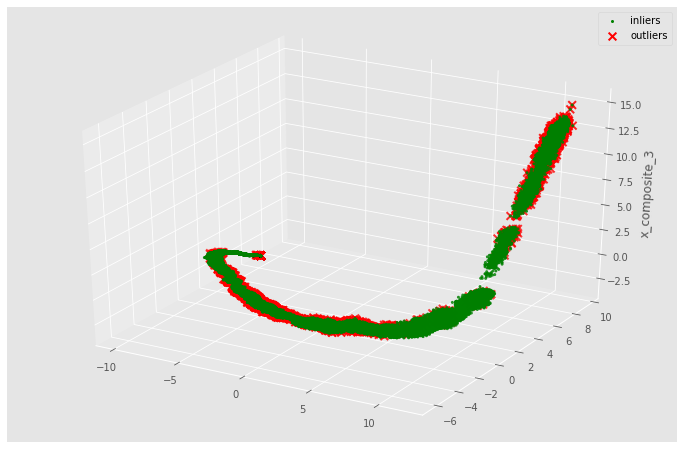

In [52]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel('x_composite_3')

# Plot the compressed data points
ax.scatter(X_reduce[:,0],X_reduce[:,1],zs=X_reduce[:,2],s=4,lw=1,label='inliers',c='green')

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1],X_reduce[outlier_index,2],
           lw=2,s=60,marker='x', c='red', label='outliers')
ax.legend()
plt.show()

    Now as we see the 3D point the anomaly points are mostly wide from the cluster of normal points,
    but a 2D point will help us to even judge better.
    Lets try plotting the same fed to a PCA reduced to 2 dimensions.

In [53]:
pca = PCA(2)

In [54]:
pca.fit(table[to_model_columns])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [55]:
res = pd.DataFrame(pca.transform(table[to_model_columns]))

In [56]:
Z = np.array(res)

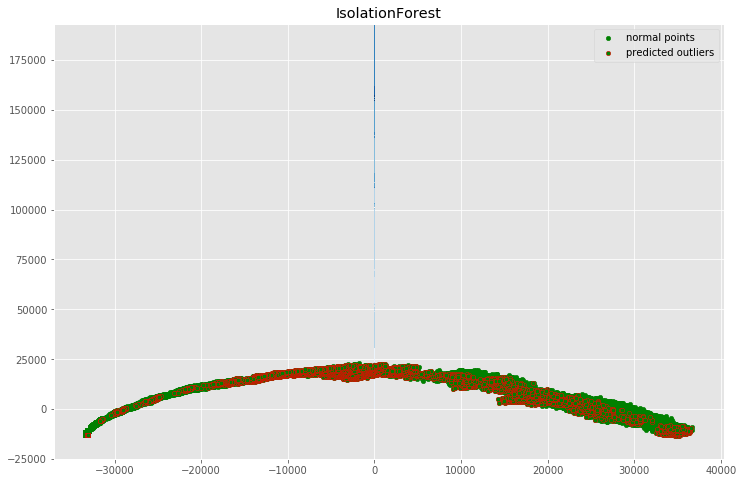

In [58]:
fig = plt.figure(figsize=(12,8))
plt.title('IsolationForest')

plt.contourf(Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1],c='green',s=20,label='normal points')
b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1],c='green',s=20,
                 edgecolor='red',label='predicted outliers')

plt.legend(loc='upper right')
plt.show()

    참고: 시계열 데이터일 경우 outlier 그래프상에 표현

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
def plot_anomaly(df,metric_name):
    df.load_date = pd.to_datetime(df['load_date'].astype(str), format="%Y%m%d")
    dates = df.load_date
    #identify the anomaly points and create a array of its values for plot
    bool_array = (abs(df['anomaly']) > 0)
    actuals = df["actuals"][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan
    #A dictionary for conditional format table based on anomaly
    color_map = {0: "'rgba(228, 222, 249, 0.65)'", 1: "yellow", 2: "red"}
    
    #Table which includes Date,Actuals,Change occured from previous point
    table = go.Table(
        domain=dict(x=[0, 1],
                    y=[0, 0.3]),
        columnwidth=[1, 2],
        # columnorder=[0, 1, 2,],
        header=dict(height=20,
                    values=[['<b>Date</b>'], ['<b>Actual Values </b>'], ['<b>% Change </b>'],
                            ],
                    font=dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                    fill=dict(color='#d562be')),
        cells=dict(values=[df.round(3)[k].tolist() for k in ['load_date', 'actuals', 'percentage_change']],
                   line=dict(color='#506784'),
                   align=['center'] * 5,
                   font=dict(color=['rgb(40, 40, 40)'] * 5, size=12),
                   # format = [None] + [",.4f"] + [',.4f'],
                   # suffix=[None] * 4,
                   suffix=[None] + [''] + [''] + ['%'] + [''],
                   height=27,
                   fill=dict(color=[test_df['anomaly_class'].map(color_map)],#map based on anomaly level from dictionary
                   )
                   ))
    #Plot the actuals points
    Actuals = go.Scatter(name='Actuals',
                         x=dates,
                         y=df['actuals'],
                         xaxis='x1', yaxis='y1',
                         mode='line',
                         marker=dict(size=12,
                                     line=dict(width=1),
                                     color="blue"))
#Highlight the anomaly points
    anomalies_map = go.Scatter(name="Anomaly",
                               showlegend=True,
                               x=dates,
                               y=anomaly_points,
                               mode='markers',
                               xaxis='x1',
                               yaxis='y1',
                               marker=dict(color="red",
                                           size=11,
                                           line=dict(
                                               color="red",
                                               width=2)))
axis = dict(
        showline=True,
        zeroline=False,
        showgrid=True,
        mirror=True,
        ticklen=4,
        gridcolor='#ffffff',
        tickfont=dict(size=10))
layout = dict(
        width=1000,
        height=865,
        autosize=False,
        title=metric_name,
        margin=dict(t=75),
        showlegend=True,
        xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),
        yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20, 1], anchor='x1', hoverformat='.2f')))
fig = go.Figure(data=[table, anomalies_map, Actuals], layout=layout)
iplot(fig)
pyplot.show()

In [ ]:
def classify_anomalies(df,metric_name):
    df['metric_name']=metric_name
    df = df.sort_values(by='load_date', ascending=False)
    #Shift actuals by one timestamp to find the percentage chage between current and previous data point
    df['shift'] = df['actuals'].shift(-1)
    df['percentage_change'] = ((df['actuals'] - df['shift']) / df['actuals']) * 100
    #Categorise anomalies as 0-no anomaly, 1- low anomaly , 2 - high anomaly
    df['anomaly'].loc[df['anomaly'] == 1] = 0
    df['anomaly'].loc[df['anomaly'] == -1] = 2
    df['anomaly_class'] = df['anomaly']
    max_anomaly_score = df['score'].loc[df['anomaly_class'] == 2].max()
    medium_percentile = df['score'].quantile(0.24)
    df['anomaly_class'].loc[(df['score'] > max_anomaly_score) & (df['score'] <= medium_percentile)] = 1
    return df

In [ ]:
import warnings  
warnings.filterwarnings('ignore')
for i in range(1,len(metrics_df.columns)-1):
    clf.fit(metrics_df.iloc[:,i:i+1])
    pred = clf.predict(metrics_df.iloc[:,i:i+1])
    test_df=pd.DataFrame()
    test_df['load_date']=metrics_df['load_date']
    #Find decision function to find the score and classify anomalies
    test_df['score']=clf.decision_function(metrics_df.iloc[:,i:i+1])
    test_df['actuals']=metrics_df.iloc[:,i:i+1]
    test_df['anomaly']=pred
    #Get the indexes of outliers in order to compare the metrics     with use case anomalies if required
    outliers=test_df.loc[test_df['anomaly']==-1]
    outlier_index=list(outliers.index)
    test_df=classify_anomalies(test_df,metrics_df.columns[i])
    plot_anomaly(test_df,metrics_df.columns[i])


https://miro.medium.com/max/1166/1*6V6nnv_mgDpk7KGdA5QJfQ.png